#                               Box Office Trends and Insights: Microsoft New Movie Studio

# Introduction

In this analysis for Microsoft, we will make use of everything we have learned about pandas, data cleaning, and




exploratory data analysis. In order to complete this analysis, you will have to import, clean, combine, reshape







and visualize data to answer the questions provided.Even as a junior data scientist, you can produce interesting







analyses by combining multiple datasets .You will get a chance to practice all of these skills with the movie 







datasets which contains information about movies.

# Objectives

   You will be able to:

  1.Practice loading data with pandas
  
  2.Practice identifying and handling missing values
  
  3.Practice joining multiple dataframes
  
  4.Practice using data visualizations to explore data, and interpreting those visualizations
  
  5.Perform a full exploratory data analysis process to gain insight about a dataset
  

# Your Task : Analyzing movies datasets to provide insights for Microsoft New Movie Studio

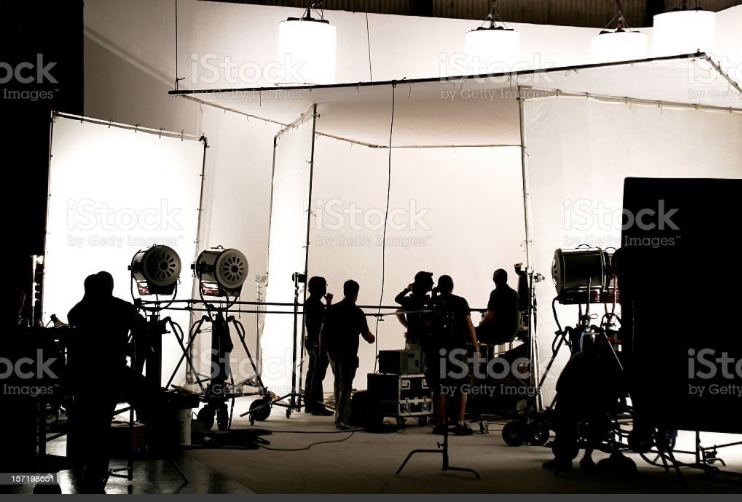

# Data Understanding

 The data sets offered contain a wide range of data essential to understanding our business concerns.There are three selected 

 datasets.The data is contained in four separate CSV files:

    
 1.imdb.title.basics.csv: which provides information about movies that emphasize various genres,titles,start years and their running times.
    
    
    
 2.imdb.title.ratings.csv: which provides information about average rating of movies and their number of votes.
    
    
    
 3.bom.movie_gross.csv: that highlights the box office earnings of movies over a particular period of time.
 



 4.tn.movie_budgets.csv: that highlights the production budgets and domestic,worldwide profits.


# Business Understanding


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have 




decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring 




what types of films are currently doing the best at the box office. You must then translate those findings into actionable




insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.










The business questions to be answered  are:




1.Analyzing the distribution of genres in movies dataset and the mean runtime minutes by 
 genre to find out how long most movies run.
 
 

2.Analyzing the most popular and profitable genres to invest in.



3.Analyzing studios with the highest  average total gross.



4.Analyzing the relationship between total gross profit and the production budget.






# Requirements

1.Import the required libraries and load the data with pandas.

  Import pandas,seaborn,numpy and matplotlib.Create  dataframes that represent the three CSV files. 
  Use pandas methods to inspect the shape and other attributes of these dataframes. 

2.Perform Data Cleaning and answer the first question.

  You will be required to check for and deal with missing values,extract and split the genres then create a 
  visualization of distribution of genres.

3.Get the mean runtime minutes by genre.

  You will be required to split the genres, find the mean runtime_minutes by genre and provide a visualization.

4.Analyze the most popular and profitable genres to invest in.

  You will be required to merge dataframes,perform data cleaning on merged dataframe, grooup by genres and number of votes 
  or averagerating and create a visualization.

5.Analyze studios with the highest  average total gross.

  You will be required to find average total gross of different studios and create a visualization to find most profitable
  studios.
  
6.Analyze the relationship between total gross profit and the production budget.

# Import the required libraries


In [27]:
# Your code here -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 1.Load the Data

In [28]:
#Load the content on title.basics.csv
title_basics=pd.read_csv("zippedData/imdb.title.basics.csv")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [29]:
# Write a code that displays a summary of , providing useful information about its structure and contents.
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [30]:
# Run this cell without changes

# There should be 146144 rows
assert title_basics.shape[0] == 146144

# There should be 6 columns. If this fails, make sure you got rid of
# the extra index column
assert title_basics.shape[1] == 6

# These should be the columns
assert list(title_basics.columns) == [
    "tconst",
    "primary_title",
    "original_title",
    "start_year",
    "runtime_minutes",
    "genres",
]

# Perform Data Cleaning

In [31]:
#Write a code that displays how many null values we have in the title_basics DataFrame
null_values0 = title_basics.isna().sum().sum()
if null_values0 == 0:
    print ('There are {} null values'. format(null_values0))
else:
      print ('There are {} null values'. format(null_values0))

There are 37168 null values


In [32]:
#Assert the number of null values
assert null_values0 == 37168, "Expected 37168 null values, but found {}".format(null_values0)



In [33]:
#Write a code that shows if we have duplicates in the title_basics DataFrame
duplicates = []
for i in title_basics.duplicated():
    duplicates.append(i)
if len(set(duplicates)) == 1:
    print('There are no duplicate rows')
else: 
    print('There are {} duplicate rows'.format(title_basics.duplicated.value_counts().sum()))
    

There are no duplicate rows


In [34]:
# Drop the rows with null values in the columns original_title,runtime_minutes and genre
title_basics.dropna(subset=['original_title','runtime_minutes','genres'])


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [35]:
#Convert start year to datetime object
title_basics['start_year']=pd.to_datetime(title_basics['start_year'],format='%Y')

In [36]:
# Write a code that displays a summary of  cleaned df, providing useful information about its structure and contents.
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           146144 non-null  object        
 1   primary_title    146144 non-null  object        
 2   original_title   146123 non-null  object        
 3   start_year       146144 non-null  datetime64[ns]
 4   runtime_minutes  114405 non-null  float64       
 5   genres           140736 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.7+ MB


# Analyzing Distribution of Genres in the dataset

In [37]:
# Extract and split the genres
genre_data = title_basics['genres'].str.split(',')

In [38]:
#Loop through the genre_data and add individual genres to the all_genres list
all_genres= []
for genres in genre_data:
   if isinstance(genres,list):
        all_genres.extend(genres)
    

In [39]:
# Check the assertion
expected_genres = title_basics['genres'].str.count(',') + 1  # Expected number of genres after splitting
actual_genres = len(all_genres)

assert actual_genres == expected_genres.sum(), "Mismatch in the number of extracted genres. Expected: {}, Found: {}".format(expected_genres.sum(), actual_genres)

In [40]:
#Create a DataFrame of Genre counts
genre_counts=pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns=['genre','count']

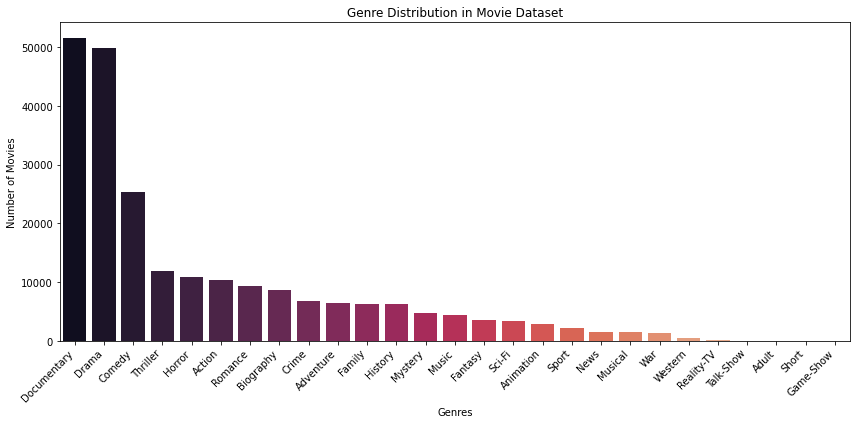

In [41]:
#Create a bar plot to visualize the distribution of genres
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='count',data=genre_counts, palette='rocket')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution in Movie Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
#Print the top 10 most common genres
print(genre_counts.head(5))

         genre  count
0  Documentary  51640
1        Drama  49883
2       Comedy  25312
3     Thriller  11883
4       Horror  10805


# Analyzing  the mean runtime minutes by genre

In [43]:
# Summary statistics of runtime
runtime_summary = title_basics['runtime_minutes'].describe()
runtime_summary

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [44]:
# Split genres into separate rows

genre_df =title_basics.dropna(subset=['original_title','runtime_minutes', 'genres'])['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

In [45]:
# Merge genre_df with title_basics

merged_df =title_basics.dropna(subset=['original_title','runtime_minutes', 'genres']).drop('genres', axis=1).join(genre_df)

In [46]:

# Get the mean runtime_minutes by genre

genre_runtime = merged_df.groupby('genre')['runtime_minutes'].mean().sort_values(ascending=False)

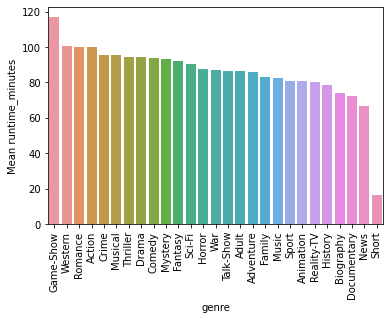

In [47]:
# Create a bar plot of mean runtime_minutes by genre 
sns.barplot(x=genre_runtime.index, y=genre_runtime.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Mean runtime_minutes')

# Show plot
plt.show()

# Answering the first Question

Based on the analysis of genre distruibution in the movie dataset we see that Documentary,Drama,Comedy,Thriller and horror


have the highest number of movies,Microsoft should consider investing in creating films in these genres.




Based on the analysis of the mean runtimes by genres we see that most of these genres have a runtime of 80-100 


minutes,Microsoft should consider in investing in films that have a runtime of 80-100 minutes.


# 2.Load the data

In [48]:
#Load the data on imdb.title.ratings.csv
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [49]:
# Write a code that displays a summary of , providing useful information about its structure and contents.
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Merge the first two Dataframes

In [50]:
#Merge the 'title_ratings' and 'title_basics' DataFrames on 'tconst'
merged_data = pd.merge(title_ratings, title_basics, on='tconst')
merged_data

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019-01-01,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019-01-01,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010-01-01,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014-01-01,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011-01-01,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018-01-01,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018-01-01,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019-01-01,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019-01-01,81.0,Documentary


In [51]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           73856 non-null  object        
 1   averagerating    73856 non-null  float64       
 2   numvotes         73856 non-null  int64         
 3   primary_title    73856 non-null  object        
 4   original_title   73856 non-null  object        
 5   start_year       73856 non-null  datetime64[ns]
 6   runtime_minutes  66236 non-null  float64       
 7   genres           73052 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ MB


In [52]:
# Drop rows with missing values in 'runtime_minutes' and 'genres' columns
merged_data1 = merged_data.dropna(subset=['runtime_minutes','genres'])


In [53]:
# Check the assertion
assert merged_data1['runtime_minutes'].isna().sum() == 0, "There are still missing values in 'runtime_minutes' column"
assert merged_data1['genres'].isna().sum() == 0, "There are still missing values in 'genres' column"

In [54]:
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           65720 non-null  object        
 1   averagerating    65720 non-null  float64       
 2   numvotes         65720 non-null  int64         
 3   primary_title    65720 non-null  object        
 4   original_title   65720 non-null  object        
 5   start_year       65720 non-null  datetime64[ns]
 6   runtime_minutes  65720 non-null  float64       
 7   genres           65720 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.5+ MB


In [55]:
# Check the number of non-null entries for each column
assert merged_data1['tconst'].notnull().all(), "Some values in 'tconst' column are null"
assert merged_data1['averagerating'].notnull().all(), "Some values in 'averagerating' column are null"
assert merged_data1['numvotes'].notnull().all(), "Some values in 'numvotes' column are null"
assert merged_data1['primary_title'].notnull().all(), "Some values in 'primary_title' column are null"
assert merged_data1['original_title'].notnull().all(), "Some values in 'original_title' column are null"
assert merged_data1['start_year'].notnull().all(), "Some values in 'start_year' column are null"
assert merged_data1['runtime_minutes'].notnull().all(), "Some values in 'runtime_minutes' column are null"
assert merged_data1['genres'].notnull().all(), "Some values in 'genres' column are null"


# Analyzing the most popular and profitable genres to invest in.


In [56]:
#Find the top 5 most popular genre
# The ascending parameter to False is used to sort data in descending order.

merged_data1['genres'].value_counts().sort_values(ascending=False).head(10)

Drama                   10189
Documentary              9149
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Name: genres, dtype: int64

In [57]:
#This code creates a DataFrame named liked_genre by grouping the numvotes column  by the genres column.
#The iloc method is used to select the top 15 rows of the sorted DataFrame
liked_genre = pd.DataFrame(merged_data1.groupby('genres')['numvotes'].mean()).sort_values( by = 'numvotes', ascending = False).iloc[:15]
liked_genre

,numvotes
genres,
"Action,Fantasy,War",262978.000000
"Action,Adventure,Sci-Fi",187179.292683
"Adventure,Mystery,Sci-Fi",135042.500000
"Adventure,Drama,Sci-Fi",99316.950000
"Action,Adventure,Fantasy",96588.050000
"Biography,Drama,Thriller",88518.904762
"Action,Adventure,Thriller",81476.152174
"Action,Adventure,Mystery",80838.111111
"Action,Crime,Sci-Fi",78214.125000


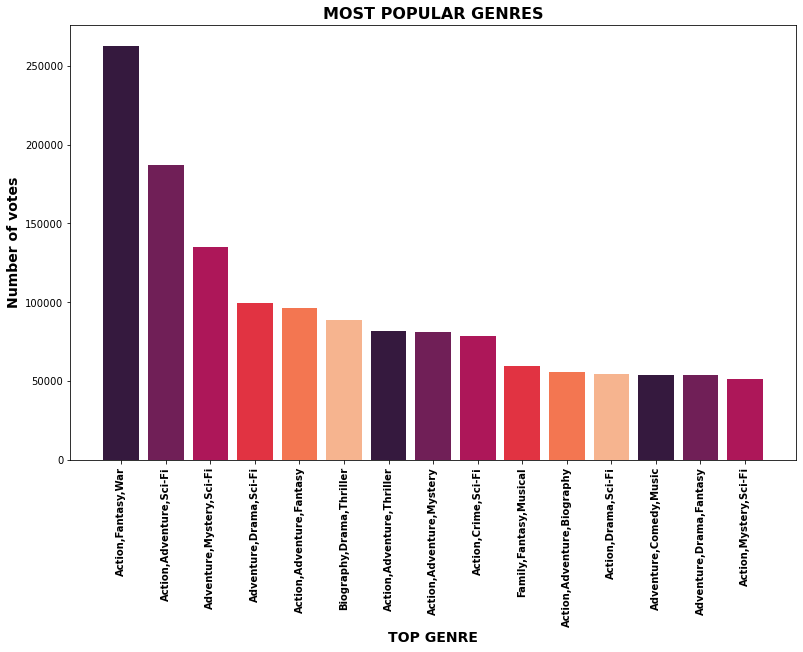

In [58]:
#Create a bar plot of the top genre against the number of votes

plt.figure(figsize=(13, 8))
plt.xticks(rotation=90, fontsize=10, fontweight= 'bold')
plt.title('MOST POPULAR GENRES', fontsize=16, fontweight='bold')
plt.xlabel('TOP GENRE', fontsize=14, fontweight='bold')
plt.ylabel('Number of votes', fontsize=14, fontweight='bold')
y = liked_genre["numvotes"]

# Create the color palette
palette = sns.color_palette("rocket")

# Create the bar plot
plt.bar(y.index, y.values, color= palette)

# Show the plot
plt.show()

In [59]:
#This code creates a DataFrame named liked_genre1 by grouping the averagerating column  by the genres column.
#The iloc method is used to select the top 15 rows of the sorted DataFrame
liked_genre1 = pd.DataFrame(merged_data.groupby('genres')['averagerating'].mean()).sort_values( by = 'averagerating', ascending = False).iloc[:15]
liked_genre1

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"Documentary,Family,Musical",9.3
"History,Sport",9.2
"Music,Mystery",9.0
Game-Show,9.0
"Drama,Fantasy,War",8.8
"Documentary,News,Sport",8.8
"Comedy,Drama,Reality-TV",8.8
"Drama,Short",8.8


In [60]:
# Check the assertion
assert liked_genre1.shape[0] == 15, "Expected 15 genres, but found {}".format(liked_genre1.shape[0])
assert liked_genre1.index.is_unique, "Duplicate genres found in the DataFrame."

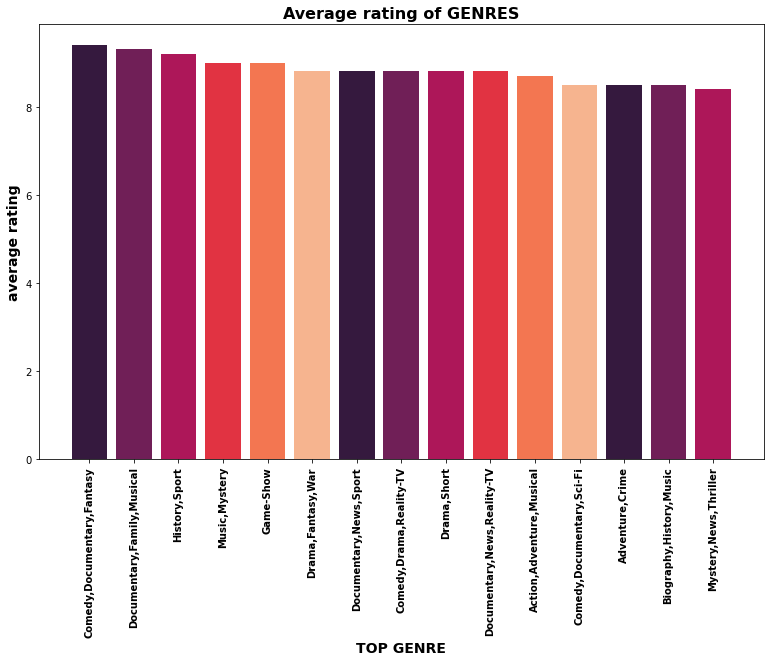

In [61]:
# create a bar plot of the top genre against averagerating

plt.figure(figsize=(13, 8))
plt.xticks(rotation=90, fontsize=10, fontweight= 'bold')
plt.title('Average rating of GENRES', fontsize=16, fontweight='bold')
plt.xlabel('TOP GENRE', fontsize=14, fontweight='bold')
plt.ylabel('average rating', fontsize=14, fontweight='bold')
y = liked_genre1["averagerating"]

# Create the color palette
palette = sns.color_palette("rocket")

# Create the bar plot
plt.bar(y.index, y.values, color= palette)

# Show the plot
plt.show()

# Answering the second question

The top 3 most popular genres combination according to the number of votes are: (Action,Fantasy,War), (Action,Adventure,SciFi) 
and (Adventure,Mystery, SciFi).




The top three genre combinations with the highest ratings are :(Comedy,Documentary,Fantasy),(Documentary,Family,Medical),(History,Sport)




Microsoft should should consider creating films that combine elements from these genres.By creating films that combine elements



from popular genres ,Microsoft can appeal to a wide audience and increase their chances of success at the Box office .For 


example they could create an action-adventure film that has elements of fantasy. 

# 3.Load the Data

In [62]:
#load the content on bom.movie_gross.csv
movie_gross1= pd.read_csv('zippedData/bom.movie_gross.csv')
movie_gross1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [63]:
#Write a code that displays a summary of , providing useful information about its structure and contents.
movie_gross1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [64]:
#Write a code to generate descriptive statistics of the dataframe
movie_gross1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Perform Data Cleaning

In [65]:
#Check for null values
null_counts = movie_gross1.isnull().sum()
null_counts

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [66]:
# Assert the number of null values in each column
assert null_counts['title'] == 0, "There are {} null values in 'title' column".format(null_counts['title'])
assert null_counts['studio'] == 5, "There are {} null values in 'studio' column".format(null_counts['studio'])
assert null_counts['domestic_gross'] == 28, "There are {} null values in 'domestic_gross' column".format(null_counts['domestic_gross'])
assert null_counts['foreign_gross'] == 1350, "There are {} null values in 'foreign_gross' column".format(null_counts['foreign_gross'])
assert null_counts['year'] == 0, "There are {} null values in 'year' column".format(null_counts['year'])

In [67]:
#Drop any rows with missing values
movie_gross1.dropna(subset=['studio','domestic_gross','foreign_gross'],inplace=True)

In [68]:

# Convert the domestic_gross column to integer datatype
movie_gross1['domestic_gross']=movie_gross1['domestic_gross'].astype(int)

In [69]:
# Convert the 'year' columnto a datetime datatype
movie_gross1['year']=pd.to_datetime(movie_gross1['year'],format='%Y')

In [70]:
# Remove non-numeric characters (e.g., commas) from 'foreign_gross' column
movie_gross1['foreign_gross'] = movie_gross1['foreign_gross'].str.replace(',', '')

In [71]:
# Convert the cleaned strings to integer values
movie_gross1['foreign_gross'] = pd.to_numeric(movie_gross1['foreign_gross'], errors='coerce', downcast='integer')


In [72]:
# Convert the foreign_gross column to integer datatype
movie_gross1['foreign_gross']=movie_gross1['foreign_gross'].astype(int)

In [73]:
# Drop any rows with missing or invalid values again
movie_gross1.dropna(subset=['foreign_gross'],inplace=True)

In [74]:
movie_gross1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           2007 non-null   object        
 1   studio          2007 non-null   object        
 2   domestic_gross  2007 non-null   int32         
 3   foreign_gross   2007 non-null   int32         
 4   year            2007 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 78.4+ KB


# Analyzing studios with the highest  average total gross.


In [75]:
# Create a new column "total_gross" in the movie_gross1 that adds the domestic_gross and foreign_gross columns
movie_gross1['total_gross']=movie_gross1['domestic_gross'] + movie_gross1['foreign_gross']

In [76]:
#Check to see if the new column was added
movie_gross1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010-01-01,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01,960300000
3,Inception,WB,292600000,535700000,2010-01-01,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01,752600000


In [77]:
# Write a  code that calculates the mean total_gross revenue for each movie studio in the movie_gross DataFrame.
movie_gross1_grouping = movie_gross1.groupby('studio')['total_gross'].mean()

In [78]:
#Create the movie_gross1_grouping into a new data frame
movie_gross2_grouping= pd.DataFrame(movie_gross1_grouping)
movie_gross2_grouping

,total_gross
studio,
3D,1.600000e+07
A24,2.625889e+07
AF,2.327500e+06
AGF,1.768000e+05
AR,5.805000e+07
...,...
WOW,4.940000e+04
Wein.,5.936091e+07
Yash,4.920575e+07


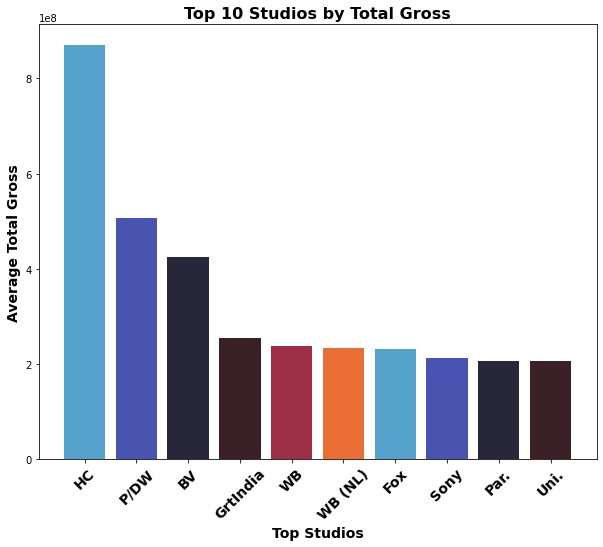

In [79]:
# Sort the groups by ascending domestic gross
top_studios = movie_gross2_grouping.sort_values(by = 'total_gross', ascending= False).head(10)

palette = sns.color_palette("icefire")
# Create a bar plot of the top 10 studios by  total_gross
plt.bar(top_studios['total_gross'].index, top_studios['total_gross'].values, color= palette, width=0.8)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.xlabel("Top Studios", fontsize=14,fontweight='bold')
plt.ylabel("Average Total Gross", fontsize=14, fontweight='bold')
plt.title("Top 10 Studios by Total Gross", fontsize=16, fontweight='bold')


#Here is set the size of the current figure to be 10 inches by 8 inches in Matplotlib, which can be useful for adjusting the aspect ratio of the plot.
plt.gcf().set_size_inches(10, 8)
plt.show()

# Answering the third question

-From the graph above, HC and P/DW are the top 2 studios with the highest average total gross.




-Also, Par. and Uni. are the bottom 2 studios with the lowest average total gross hence the least market share.





-Microsoft should consider partnering with HC and P/DW to create high grossing films.By partnering with them ,Microsoft can


leverage their expertise in creating successful films that appeal to a wide audience increasing their success at the box 

office.

# 4.Load the data

In [80]:
#Load the data on imdb.title.ratings.csv
movie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [81]:
# Write a code that displays a summary of , providing useful information about its structure and contents.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Perform data cleaning

In [82]:
# Convert 'production_budget' to numeric data type
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)


In [83]:
# Convert 'domestic_gross' to numeric data type
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)


In [84]:
# Convert 'foreign_gross' to numeric data type
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)


In [85]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


# Analyzing the relationship between total gross profit and the production budget.



In [86]:
# Calculate domestic gross profit for each movie
movie_budgets['domestic_gross_profit'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']


In [87]:
# Calculate worldwide gross profit for each movie
movie_budgets['worldwide_gross_profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']


In [88]:
# Calculate total gross profit for each movie
movie_budgets['total_gross_profit'] = movie_budgets['worldwide_gross_profit'] + movie_budgets['domestic_gross_profit']


In [89]:
#Check for the new columns
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,total_gross_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2.686853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,4.655278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,-5.074753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,1.200820e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,1.302903e+09


In [90]:
#Find the correlation between 'production_budget' and 'total_gross_profit'
movie_budgets['production_budget'].corr(movie_budgets['total_gross_profit'])

0.50289502904762

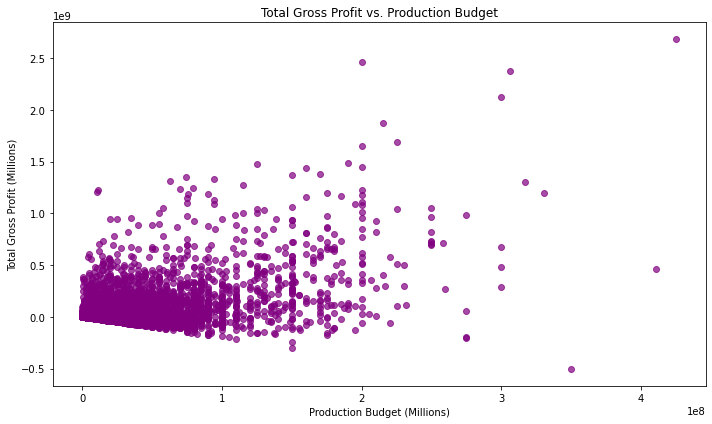

In [91]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_budgets['production_budget'], movie_budgets['total_gross_profit'], color='purple', alpha=0.7)
plt.xlabel('Production Budget (Millions)')
plt.ylabel('Total Gross Profit (Millions)')
plt.title('Total Gross Profit vs. Production Budget')
plt.tight_layout()
plt.show()

# Answering the fourth Question

Microsoft should consider investing in high budget films.There is a moderate positive correlation between production budget



and total gross profit which suggests that in general as the production budget increases ,gross profit also tends to increase.



However, it is important to note that there is still a variability in the data and other factors might influence the 


relationship.




# Summary

From the above analysis of the four business problems, Microsoft may create a film production company that 


successfully competeswith current studios and creates engaging material for audiences by investing in high 


budget films, partnering with HC and P/DW to create high grossing films,consider creating films that combine 


elements from the most popular genres,consider in investing in films that  have a runtime of 80-100 minutes.

















Aside from the analysis other recommendations i would give to Microsoft new movie studio include creating movies


with strong character development with high quality content.Microsoft should consider partnering with well known 


directors and actors to help bring their movies to life and create a distinct  brand and strategy.